# Pandas P1 Continued

![more_pandas](https://media.giphy.com/media/KyBX9ektgXWve/giphy.gif)

In [77]:
# You will get very used to these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Learning Goals:

1. Learn to interact with and manipulate dataframe columns
2. Learn to interact with and manipulate dataframe row indices
3. Identify and deal with N/A values
4. Visualize data using built in dataframe methods and MPL

There are several well-worn datasets you will come to know: the iris dataset, the boston housing dataset, the heart dataset.  In this notebook, we will look at the Titanic dataset.  As a tool, it is a bit macabre - predicting survival on the ill-fated ship - but it is still very useful.

![leo_titanic](https://media.giphy.com/media/XOY5y7YXjTD7q/giphy.gif)

In [78]:
# The data is in the csv file called titanic.csv
# create a dataframe object using it, and look at the head to start getting familiar with its structure

df = pd.read_csv('titanic.csv')

# 1. Learn to interact and manipulate dataframe columns

Let's take a look at the head of the data frame and the shape, just to get a quick overview.

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.shape
#(rows/records,colums)


(891, 12)

In [81]:
df.shape[0]
#how many rows index 0 shows that


891

In [82]:
df.shape[1]
# 0 and one indiced show this

12

### Quick knowledge check
We always want to be aware of what a row represents. 

What does each row in the dataframe represent? 

In [83]:
# Type answer here
#a person who sailed on the titanic

Like most things code, there are several ways to view columns.

The first way is to look at the columns attribute of the dataframe.

In [84]:
# We are getting familiar with dataframe attributes: .shape and now .columns
df.columns
#it is a indexes base index aka an index object

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
# We can confirm that the number of columns matches the second index of the shape attribute

len(df.columns) == df.shape[1]

True

A second way to see the columns is using the built in list() method:

In [86]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Consider the situation where you want to rename a column in the dataframe. Let's say you are getting tired of remembering that SibSp refers to siblings and spouses. We can rename it like so:

In [87]:
df.rename({'SibSp':'siblings_and_spouses'}, axis=1)
# Axis tells the rename method to look for SibSp along the columns axis
#axis=0 operates on rows  1=colums

,PassengerId,Survived,Pclass,Name,Sex,Age,siblings_and_spouses,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Great. Now print out the head of the df

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looks like something did not register.  The column name is back to SibSp. 
A finicky thing about Pandas is the use of inplace.  
In order for the object to be transformed in memory, we need to assign the inplace paramater the value of True

In [89]:
df.rename({'SibSp':'siblings_and_spouses'}, axis=1, inplace=True)
#need to use inplace to have it run for the rest of your code
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,siblings_and_spouses,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,siblings_and_spouses,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can also change multiple columns at once with a dictionary:

In [91]:
df.rename(columns = {'Parch': 'parent_child_ratio', 'Pclass': 'ticket_class'}, inplace=True)

In [92]:
df.head()

,PassengerId,Survived,ticket_class,Name,Sex,Age,siblings_and_spouses,parent_child_ratio,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can also interact directly with the .columns attribute


In [93]:
df_columns = df.columns # saved for pairprogramming

df.columns = list('ABCDEFGHIJKL')
# What will the columns of our dataframe look like now?
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


If we find a column is not useful, we can drop columns with the drop method.



In [94]:
df.drop('A', axis=1)

,B,C,D,E,F,G,H,I,J,K,L
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pair Program 1:

Take two minutes with a partner to perform this activity.

We just renamed our columns to a useless series of letters. Luckily we saved our column names in the variable df_columns. Let's rename our columns using columns attribute.  To make things neater, we want the column names to all be lowercase.   You can perform this in any way you prefer, but a list comprehension can do it in one line.

Remember, list comprehensions look like this:
> [function(variable) for variable in iterable]

In [97]:
# your answer here
lower_colums=[col.lower( for col in df]

SyntaxError: invalid syntax (<ipython-input-97-b6f717c8eba2>, line 2)

## 2. Learn to interact and manipulate dataframe row indices


Row indices are an attribute of a dataframe just as columns are.

In [98]:
# This is a RangeIndex object, which can be iterated over
df.index

RangeIndex(start=0, stop=891, step=1)

The index can be set in the same way as columns:

In [99]:
# Note they are the same length
df.index = range(1000, 1891)
df.index

RangeIndex(start=1000, stop=1891, step=1)

We can also reset the index:

In [100]:
df.reset_index(inplace=True, drop=True)

In [101]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Round Robin
Isolate the indices of those passengers who survived.
Store each in the variables below.

Then, use numpy.random.choice on those indices to create a dataframe of a random subset of 30 surviving passengers

In [121]:
#np.random.seed(42)
survived = df[df['survived']==1]
df.iloc[np.random.choice(survived.index, size=30)




SyntaxError: unexpected EOF while parsing (<ipython-input-121-bc2d72533b1d>, line 5)

## 3. Identify and deal with N/A values

NA (not available) values, are a constant annoyance.  They can mess up our code and our analysis.  One of the first steps of EDA you will perform is looking at whether your data has NA's.  

Apropo to the event it describes, the titanic dataset has many NA values. 

We can see that in a few ways, first using describe.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       891 non-null    int64  
 1   B       891 non-null    int64  
 2   C       891 non-null    int64  
 3   D       891 non-null    object 
 4   E       891 non-null    object 
 5   F       714 non-null    float64
 6   G       891 non-null    int64  
 7   H       891 non-null    int64  
 8   I       891 non-null    object 
 9   J       891 non-null    float64
 10  K       204 non-null    object 
 11  L       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Knowledge Check: From the above info() output, which columns have na's? How can you tell?


Your answer here  


Another way to see na's is with the **isna()** method

In [104]:
df.isna()

,A,B,C,D,E,F,G,H,I,J,K,L
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


More usefully, we can sum the values which are na:

In [122]:
df.isna().sum()

A      0
B      0
C      0
D      0
E      0
F    177
G      0
H      0
I      0
J      0
K    687
L      2
dtype: int64

# Student Screen Share


Let's create a dataframe composed of the subset of records with no na values whatsoever.  
Reference [this post](https://stackoverflow.com/questions/14247586/how-to-select-rows-with-one-or-more-nulls-from-a-pandas-dataframe-without-listin)  
Also: ([isna and isnull are the same](https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas))

In [123]:
# The code below select a student to share their screen and we will help them code out the solution.

student_list = ['Amanda', 'Chum', 'Dann', 'Jacob', 'Jason', 'Johnhoy',  'Matt', 
'Maximilian', 'Adam', 'Ethan', 'Karim', 'Leana', 'Luluva']
np.random.choice(student_list)

'Jacob'

## Dealing with na's


One way to deal with na's is by dropping rows that have them:


In [107]:
df.dropna()

,A,B,C,D,E,F,G,H,I,J,K,L
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Let's explore what happened there. Since we didn't include inplace=True, we can run the same code with some additions to see the difference:

In [124]:
new_df=df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       183 non-null    int64  
 1   B       183 non-null    int64  
 2   C       183 non-null    int64  
 3   D       183 non-null    object 
 4   E       183 non-null    object 
 5   F       183 non-null    float64
 6   G       183 non-null    int64  
 7   H       183 non-null    int64  
 8   I       183 non-null    object 
 9   J       183 non-null    float64
 10  K       183 non-null    object 
 11  L       183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [125]:
df[df.insa(.any(axis=1))]

SyntaxError: invalid syntax (<ipython-input-125-1d2b41c377c7>, line 1)

# Knowledge check
How did drop na affect the dataframe?  Why did it remove so many rows?

In [109]:
# your answer here

Dropna without params reduced our data significantly, which is a very bad thing. Our model performance, when we get to modeling, will heavily rely on having enough data.

Let's add a parameter to dropna:

In [110]:
list(df)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

In [111]:
df.dropna(subset=['embarked'], inplace=True)
#drops all rows with na

KeyError: ['embarked']

In [112]:
# Now theere are only two columns with na values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       891 non-null    int64  
 1   B       891 non-null    int64  
 2   C       891 non-null    int64  
 3   D       891 non-null    object 
 4   E       891 non-null    object 
 5   F       714 non-null    float64
 6   G       891 non-null    int64  
 7   H       891 non-null    int64  
 8   I       891 non-null    object 
 9   J       891 non-null    float64
 10  K       204 non-null    object 
 11  L       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


You will find that data preprocessing presents you with many paths to follow.  You have many choices you can make as to how to preprocess. 

For now let's make the choice to drop cabin, since it has so many nulls:

In [113]:
df.drop('cabin', axis=1, inplace=True)

KeyError: "['cabin'] not found in axis"

With age, let's be a bit more creative, and impute the mean. This is a common method.

##  Short Exercise
Using the fillna() method, write code below to fill the na's in age with the mean of age.

In [127]:
df.fillna('Fill Value')
# Your code here

,A,B,C,D,E,F,G,H,I,J,K,L
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Fill Value,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Fill Value,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Fill Value,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Fill Value,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Fill Value,1,2,W./C. 6607,23.4500,Fill Value,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [115]:
# Run df.info() to check that you have no more na's.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       891 non-null    int64  
 1   B       891 non-null    int64  
 2   C       891 non-null    int64  
 3   D       891 non-null    object 
 4   E       891 non-null    object 
 5   F       714 non-null    float64
 6   G       891 non-null    int64  
 7   H       891 non-null    int64  
 8   I       891 non-null    object 
 9   J       891 non-null    float64
 10  K       204 non-null    object 
 11  L       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4. Exercises: visualize data using built-in dataframe methods, plt, and sns

Dataframes have some built in methods for visualization, which you can call directly from the dataframe.    

Note: By call, we mean call a function.  For example, on a string, "TEXT", I call the .lower() function on it like so:

```python
"TEXT".lower()
```


## Hist

For example, a very useful one is hist(), 
which will display histograms of each numeric field.  

#### Exercise 1
Call hist() on the dataframe object to plot a grid of histograms of all numeric fields in the Titanic dataset


In [116]:
# your code here

#### Exericse 2 
Using seaborn, plot two histograms, one on top of the other, of the fares of people who perished and people who survived.

In [117]:
# Your code here

In [118]:
# Analyse the plot above

#### Exercise 3 
Use matplotlib to plot a bar chart of with four categoris: survived/male, survived/female, perished/male, perished/female

In [119]:
# Your code here

In [120]:
survived = df[df.survived==1]
perished = df[df.survived==0]

AttributeError: 'DataFrame' object has no attribute 'survived'

# Boxplot

Another very useful method is boxplot.  One use of boxplot is to quickly see whether there are outliers.

In [ ]:
df.boxplot()
plt.xticks(rotation=45)

#### Exercise 4 
That is a bit small. We also may want to plot histograms alongside the boxplots.  
Let's use seaborn to plot individual boxplots of age and fare above  histograms of age and fare in a 2 x 2 grid using fig, ax notation.

In [ ]:
# Your code here

#### Exerise 5

Seaborn's pairplot function is very useful for initial eda.

Run a pairplot on the entire titanic dataframe.


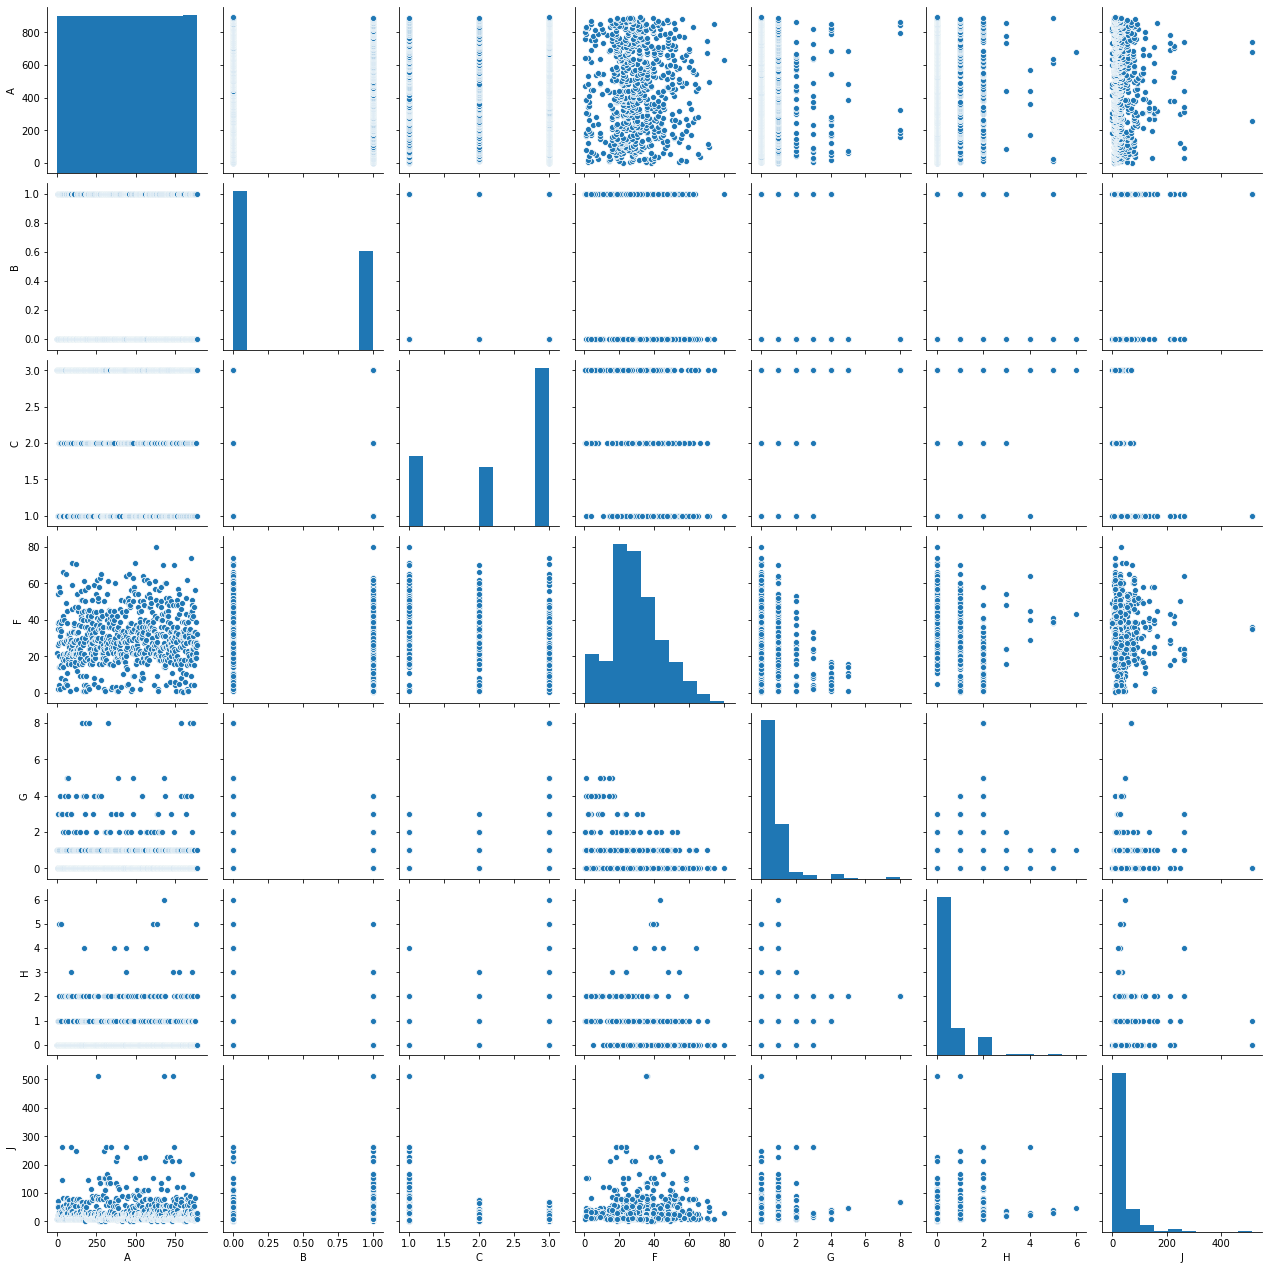

In [128]:
# Your code here
sns.pairplot(df)

Do you see any correlations between variables in the pairplot?

#### Exercise 6
Sometimes it's easier to see correlations numerically. 
We can use df.corr() to display those numbers
Correlation near 1 means strong positive correlation; correlation near -1 means strong negative

In [129]:
df.corr()

,A,B,C,F,G,H,J
A,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
B,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
C,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
F,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
G,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
H,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
J,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Now, insert df.corr() as a parameter in seaborn's heatmap plot to produce another way of visualizing correlation




In [ ]:
# your answer here